## CS 457 - Homework Assignment 3: Exploratory Data Analysis
### Ali Hashir
#### ah05433@st.habib.edu.pk

### Part 1 : Data Cleaning & Import
Importing loan_small.csv as a dataframe
Since the data is big and according to the instructions given by the professor on personal message i am only cleaning the columns that are required for the analysis and the ones that will be used for analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
%matplotlib inline     

df = pd.read_csv('loan_small.csv')
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65,162.87,B,B2,...,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96,84.33,C,C5,...,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49,339.31,C,C1,...,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69,67.79,B,B5,...,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1057818,1289186,7000,7000,7000.00000,36 months,8.90,222.28,A,A5,...,8000.34,7000.00,1000.34,0.00,0.00,0.00,Dec-14,229.64,Dec-14,INDIVIDUAL
995,1057629,1289394,2425,2425,2425.00000,36 months,15.27,84.39,C,C4,...,3052.79,2424.99,612.80,15.00,0.00,0.00,Jan-15,16.06,Jul-15,INDIVIDUAL
996,1057621,1289385,6950,6950,6950.00000,36 months,9.91,223.97,B,B1,...,7349.48,6950.01,399.47,0.00,0.00,0.00,Sep-12,1560.92,Apr-14,INDIVIDUAL
997,1057787,1289153,12375,12375,12344.46478,36 months,9.91,398.79,B,B1,...,13399.63,12375.01,1058.95,0.00,0.00,0.00,Dec-12,9056.48,Jan-16,INDIVIDUAL


In [2]:
df.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
mths_since_last_delinq     float64
mths_since_last_record     float64
open_acc            

In [3]:
df.isnull().sum()

id                           0
member_id                    0
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_title                   51
emp_length                  17
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
pymnt_plan                   0
purpose                      0
title                        0
zip_code                     0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
mths_since_last_delinq     774
mths_since_last_record     979
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                   0
total_ac

• Exclude “months” text in attribute term. For example, “36 months” can be replaced by 36 <br/>


In [4]:

df['term'] = df['term'].str.replace(' months', '')
df['term'] = df['term'].astype('int')

• emp_length can also be cleaned. Remove + and < symbols and try to make it a numerical <br/>
I am making the data numerical with the following mapping <br/>
10+ years = 10 <br/>
9 years = 9 <br/>
8 years = 8 <br/>
7 years = 7 <br/>
6 years = 6 <br/>
5 years = 5 <br/>
4 years = 4 <br/>
3 years = 3 <br/>
2 years = 2 <br/>
1 year = 1 <br/>
< 1 year = 0 

In [5]:
emp_length_dict = {
    '10+ years': 10, 
    '9 years': 9,
    '8 years': 8,
    '7 years': 7,
    '6 years': 6,
    '5 years': 5,
    '4 years': 4,
    '3 years' :3,
    '2 years' : 2,
    '1 year' :1,
    '< 1 year' : 0,
    }
df['emp_length'] = df['emp_length'].map(emp_length_dict)
df['emp_length'] = df['emp_length'].astype('float')


 • loan_status can be converted into binary attribute such as “good” or “bad” based on given 
values. For example, “Fully paid” is considered as “good” loan status with the following mapping
Fully Paid : Good <br/>
Current : Good <br/>
Charged Off : Bad <br/>
Default : Bad <br/>
Late (31-120 days) : Bad <br/>
In Grace Period : Good <br/>

In [6]:
df['loan_status'] = df['loan_status'].str.strip()
loan_status_dict = {
    'Fully Paid': 'good',
    'Current': 'good',
    'Charged Off': 'bad',
    'Default': 'bad',
    'Late (31-120 days)': 'bad',
    'In Grace Period': 'good'
}
df['loan_status'] = df['loan_status'].map(loan_status_dict)
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

loan_status
good    820
bad     179
Name: count, dtype: int64

 • attributes such as mths_since_last_delinq and mths_since_last_record need imputation
(fill in missing values)
<br/>
Since mths_since_last_delinq represents the number of months since the last delinquency, and doesn't contains any 0 so i am assuming that 0 months is the same as no delinquency. Therefore filling all null values with 0. I could have replaced with mean but alot of data is null in this column so this would add bias in our analysis. 


In [7]:
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(0)

mths_since_last_record represents the number of months since the last public record. Therefore if the public_record = 0 then the mths_since_last_record is also 0. This shows that there is no public record. Therefore filling all null values with in mths_since_last_record=0, where public_record = 0. This gives us no null value in mths_since_last_record

In [8]:
# where public record is 0 and mths_since_last_delinq is null then set to 0
df['mths_since_last_record'] = df.apply(lambda x: 0 if x['mths_since_last_record']
                                        == np.nan and x['public_records'] == 0 else x['mths_since_last_delinq'], axis=1)



### Part 2 : Exploratory Data Analysis
You do not need to use all the columns/attributes for Part 2. Use your imaginations to come up
with interesting Univariate and Bivariate analysis.

#### Summary Using Group keywords
Generate appropriate summary (count, mean, median or mode) tables using group 
keyword in pandas.  
Include at least two tables analysis or results 

##### Group summary 1 : home ownership vs loan amount

In [9]:

gs1 = df.groupby(['home_ownership']).agg(
    {'loan_amnt': ['mean','median','max','min']})
gs1


loan_amnt                      
                        mean   median    max   min
home_ownership                                    
MORTGAGE        14403.734756  12550.0  35000  1500
OWN             11988.333333  10000.0  35000  2200
RENT            11859.228188  10400.0  35000  1000

People with having home_ownership  status as "MORTAGE" have a higher avg loan amount. <br/>
I have printed the the median,max, min of the loan amount for each home_ownership status to see the affect of outliers on our claim/analysis. And it doesn't affects our analysis and our claim "People with having home_ownership  status as "MORTAGE" have a higher avg loan amount." remains the same.

##### Group summary 2 : loan amount versus interset rate

In [10]:
def map_loan_amount(x):
    ## x < 10000 : '<10K'
    ## 10000 <= x < 20000 : '10K-20K'
    ## 20000 <= x < 30000 : '20K-30K'
    ## x>=30000 : '>30K'
    if x < 10000:
        return '<10K'
    elif 10000 <= x < 20000:
        return '10K-20K'
    elif 20000 <= x < 30000:
        return '20K-30K'
    else:
        return '>30K'

    
tempdf = df
tempdf['loan_amnt_cat'] = tempdf['loan_amnt'].apply(map_loan_amount)
tempdf['loan_amnt_cat'] = tempdf['loan_amnt_cat'].astype('category')
gs2 = tempdf.groupby(['loan_amnt_cat']).agg({'int_rate': ['mean']})
gs2



,int_rate
,mean
loan_amnt_cat,
10K-20K,12.923410
20K-30K,14.881301
<10K,11.979208
>30K,15.893243


I have divided the data into categories based on the loan amount this was to see the affect of loan amount on the interest rate. And we can clearly see that interest rate increases with the the loan amount.

##### Group summary 3 : loan amount versus interset rate

In [11]:
gs3 = df.groupby(['addr_state']).agg({'purpose': lambda x: pd.Series.mode(x)[0]})
gs3

,purpose
addr_state,
AK,credit_card
AL,debt_consolidation
AR,debt_consolidation
AZ,debt_consolidation
CA,debt_consolidation
CO,credit_card
CT,credit_card
DC,credit_card
FL,debt_consolidation


The most common purpose of the loan by each state is given above

#### Generate appropriate visualizations for Univariate analysis 
<br/>At least one bar chart 
<br/>At least one histogram 

##### Bar chart: rental status count

Text(0, 0.5, 'Count')

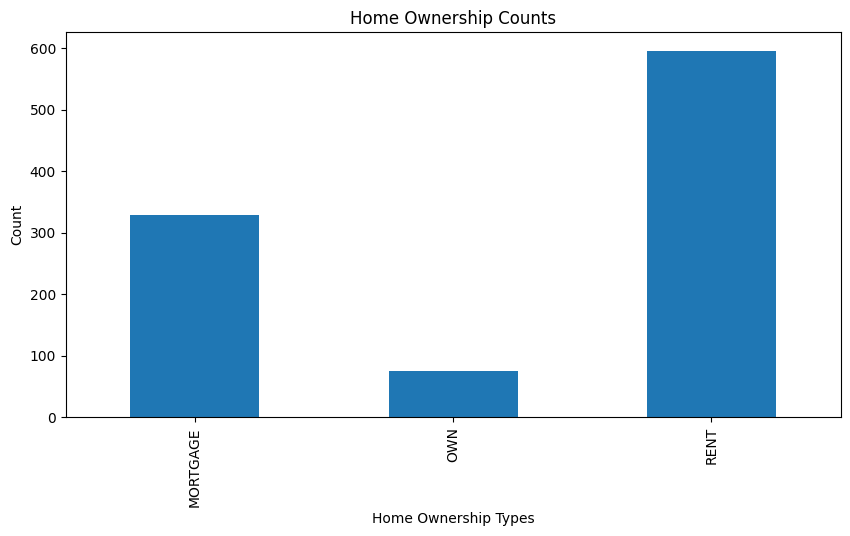

In [12]:
bar = df.groupby(['home_ownership']).agg({'loan_amnt': ['count']}).plot(kind='bar', legend=False, title='Home Ownership Counts', figsize=(10,5))
bar.set_xlabel('Home Ownership Types')
bar.set_ylabel('Count')

Shows the count of each home_ownership status. Most people applying for loans are renters. While people with own home apply less for loans

##### Histogram : loan amount

<Axes: >

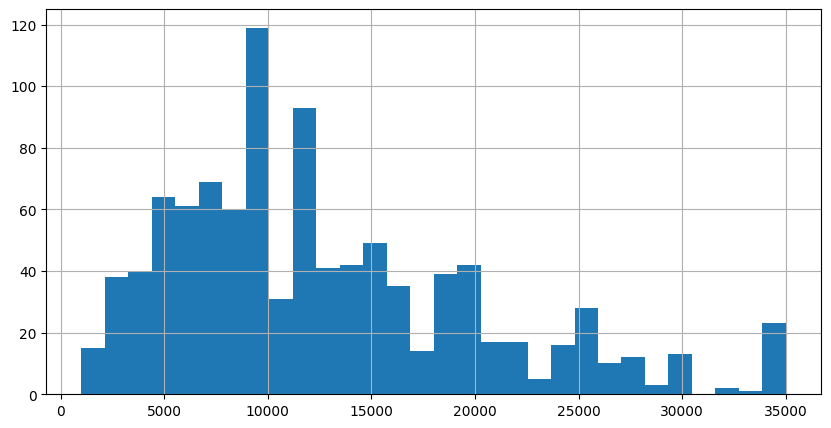

In [13]:
df['loan_amnt'].hist(bins=30, figsize=(10,5))


From the above histogram we can see that the most requestedloan amounts are in the range of $5,000 to $15,000.

#### Generate appropriate visualizations for Bivariate analysis 
<br/> At least one scatter plot (continuous vs continuous) 
<br/> At least one visualization for (discrete vs continuous) 
<br/> One correlation plot

##### Visualization (Discrete vs continous) :


Text(0, 0.5, 'Loan Amount')

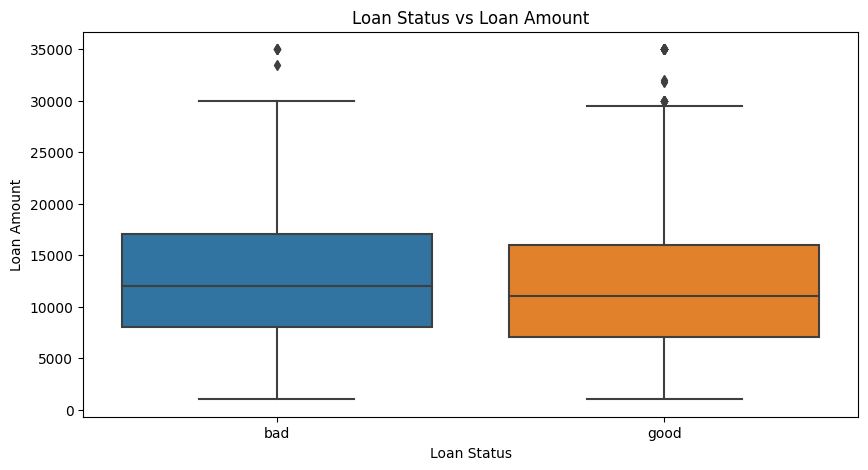

In [14]:

plt.figure(figsize=(10,5))
sns.boxplot(x='loan_status', y='loan_amnt', data=df)
plt.title('Loan Status vs Loan Amount')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')


#### Observations:

- The median loan amount is higher for loans with good status than for loans with bad status. This means that borrowers with good credit history are more likely to take out larger loans.
- The interquartile range (IQR) for loan amounts is wider for loans with good status than for loans with bad status. This means that there is greater variation in loan amounts for borrowers with good credit history.
- There are more outliers for loan amounts for loans with good status than for loans with bad status. This means that there are a few borrowers with good credit history who have taken out very large loans.

Overall, the box plot suggests that there is a positive relationship between loan status and loan amount. Borrowers with good credit history are more likely to take out larger loans than borrowers with bad credit history.

#### Additional observations:

- The box plot also shows that there are some loans with good status that have very low loan amounts. This could be due to a number of factors, such as the borrower only needing a small loan to cover a specific expense.
- There are also some loans with bad status that have relatively high loan amounts. This could be due to a number of factors, such as the borrower having a history of taking out large loans and then defaulting on them.

Overall, the box plot provides a good overview of the relationship between loan status and loan amount. However, it is important to keep in mind that there are other factors that can also influence loan amounts, such as the borrower's credit score, debt-to-income ratio, and purpose of the loan.The average loan amount in 'WY is the highest and 'WV' is the lowest. (further analysis on this done in multivariate analysis)

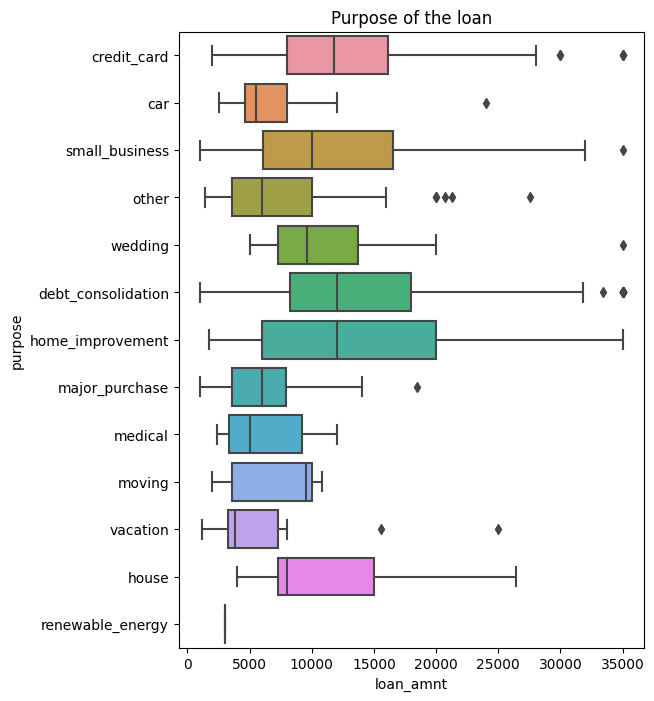

In [15]:
plt.figure(figsize=(6,8))
hue = None
sns.boxplot(data =df, x='loan_amnt', y='purpose',hue=hue)
plt.title('Purpose of the loan')
plt.show()

Loan amount varies depending on the purpose of the loan. Borrowers who are taking out loans for home improvements, debt consolidation, and weddings are more likely to take out larger loans than borrowers who are taking out loans for cars and large purchases. However, there is a wide range of loan amounts for all purposes of the loan, suggesting that there is no one-size-fits-all answer to the question of how much a loan will cost.

##### Visualization (Continous vs continous) :


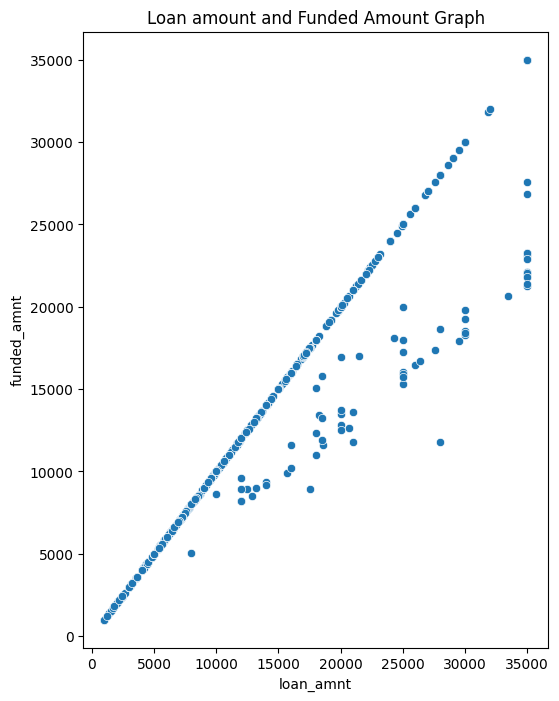

In [16]:
plt.figure(figsize=(6,8))
sns.scatterplot(data=df, x='loan_amnt', y='funded_amnt')
plt.title('Loan amount and Funded Amount Graph')
plt.show()

A linear graph appears indicating that the amount people have taken as a loan is linearly increasing approximately by same rate as funded the amount. 

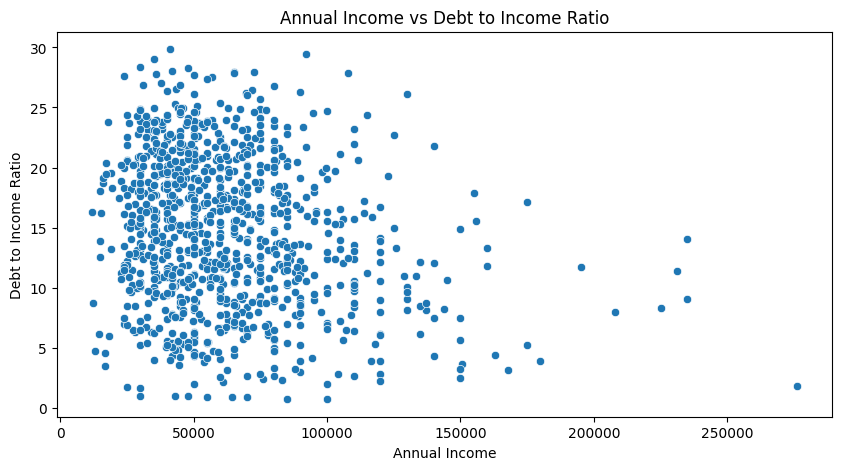

In [17]:
# Generate appropriate visualizations for Bivariate analysis as a scatter plot for continuous vs continuous.

plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="annual_inc", y="dti")
plt.xlabel('Annual Income')
plt.ylabel('Debt to Income Ratio')
plt.title('Annual Income vs Debt to Income Ratio')
plt.show()



The scatter plot shows a weak negative correlation between annual income and debt-to-income ratio (DTI). This means that borrowers with higher annual incomes tend to have lower DTI ratios. However, there is a lot of variation in DTI ratios for borrowers with all levels of annual income. This suggests that annual income is not the only factor that influences DTI ratio. Other factors, such as the borrower's credit score, debt-to-equity ratio, and purpose of the loan, may also play a role.

#### Co relation plot

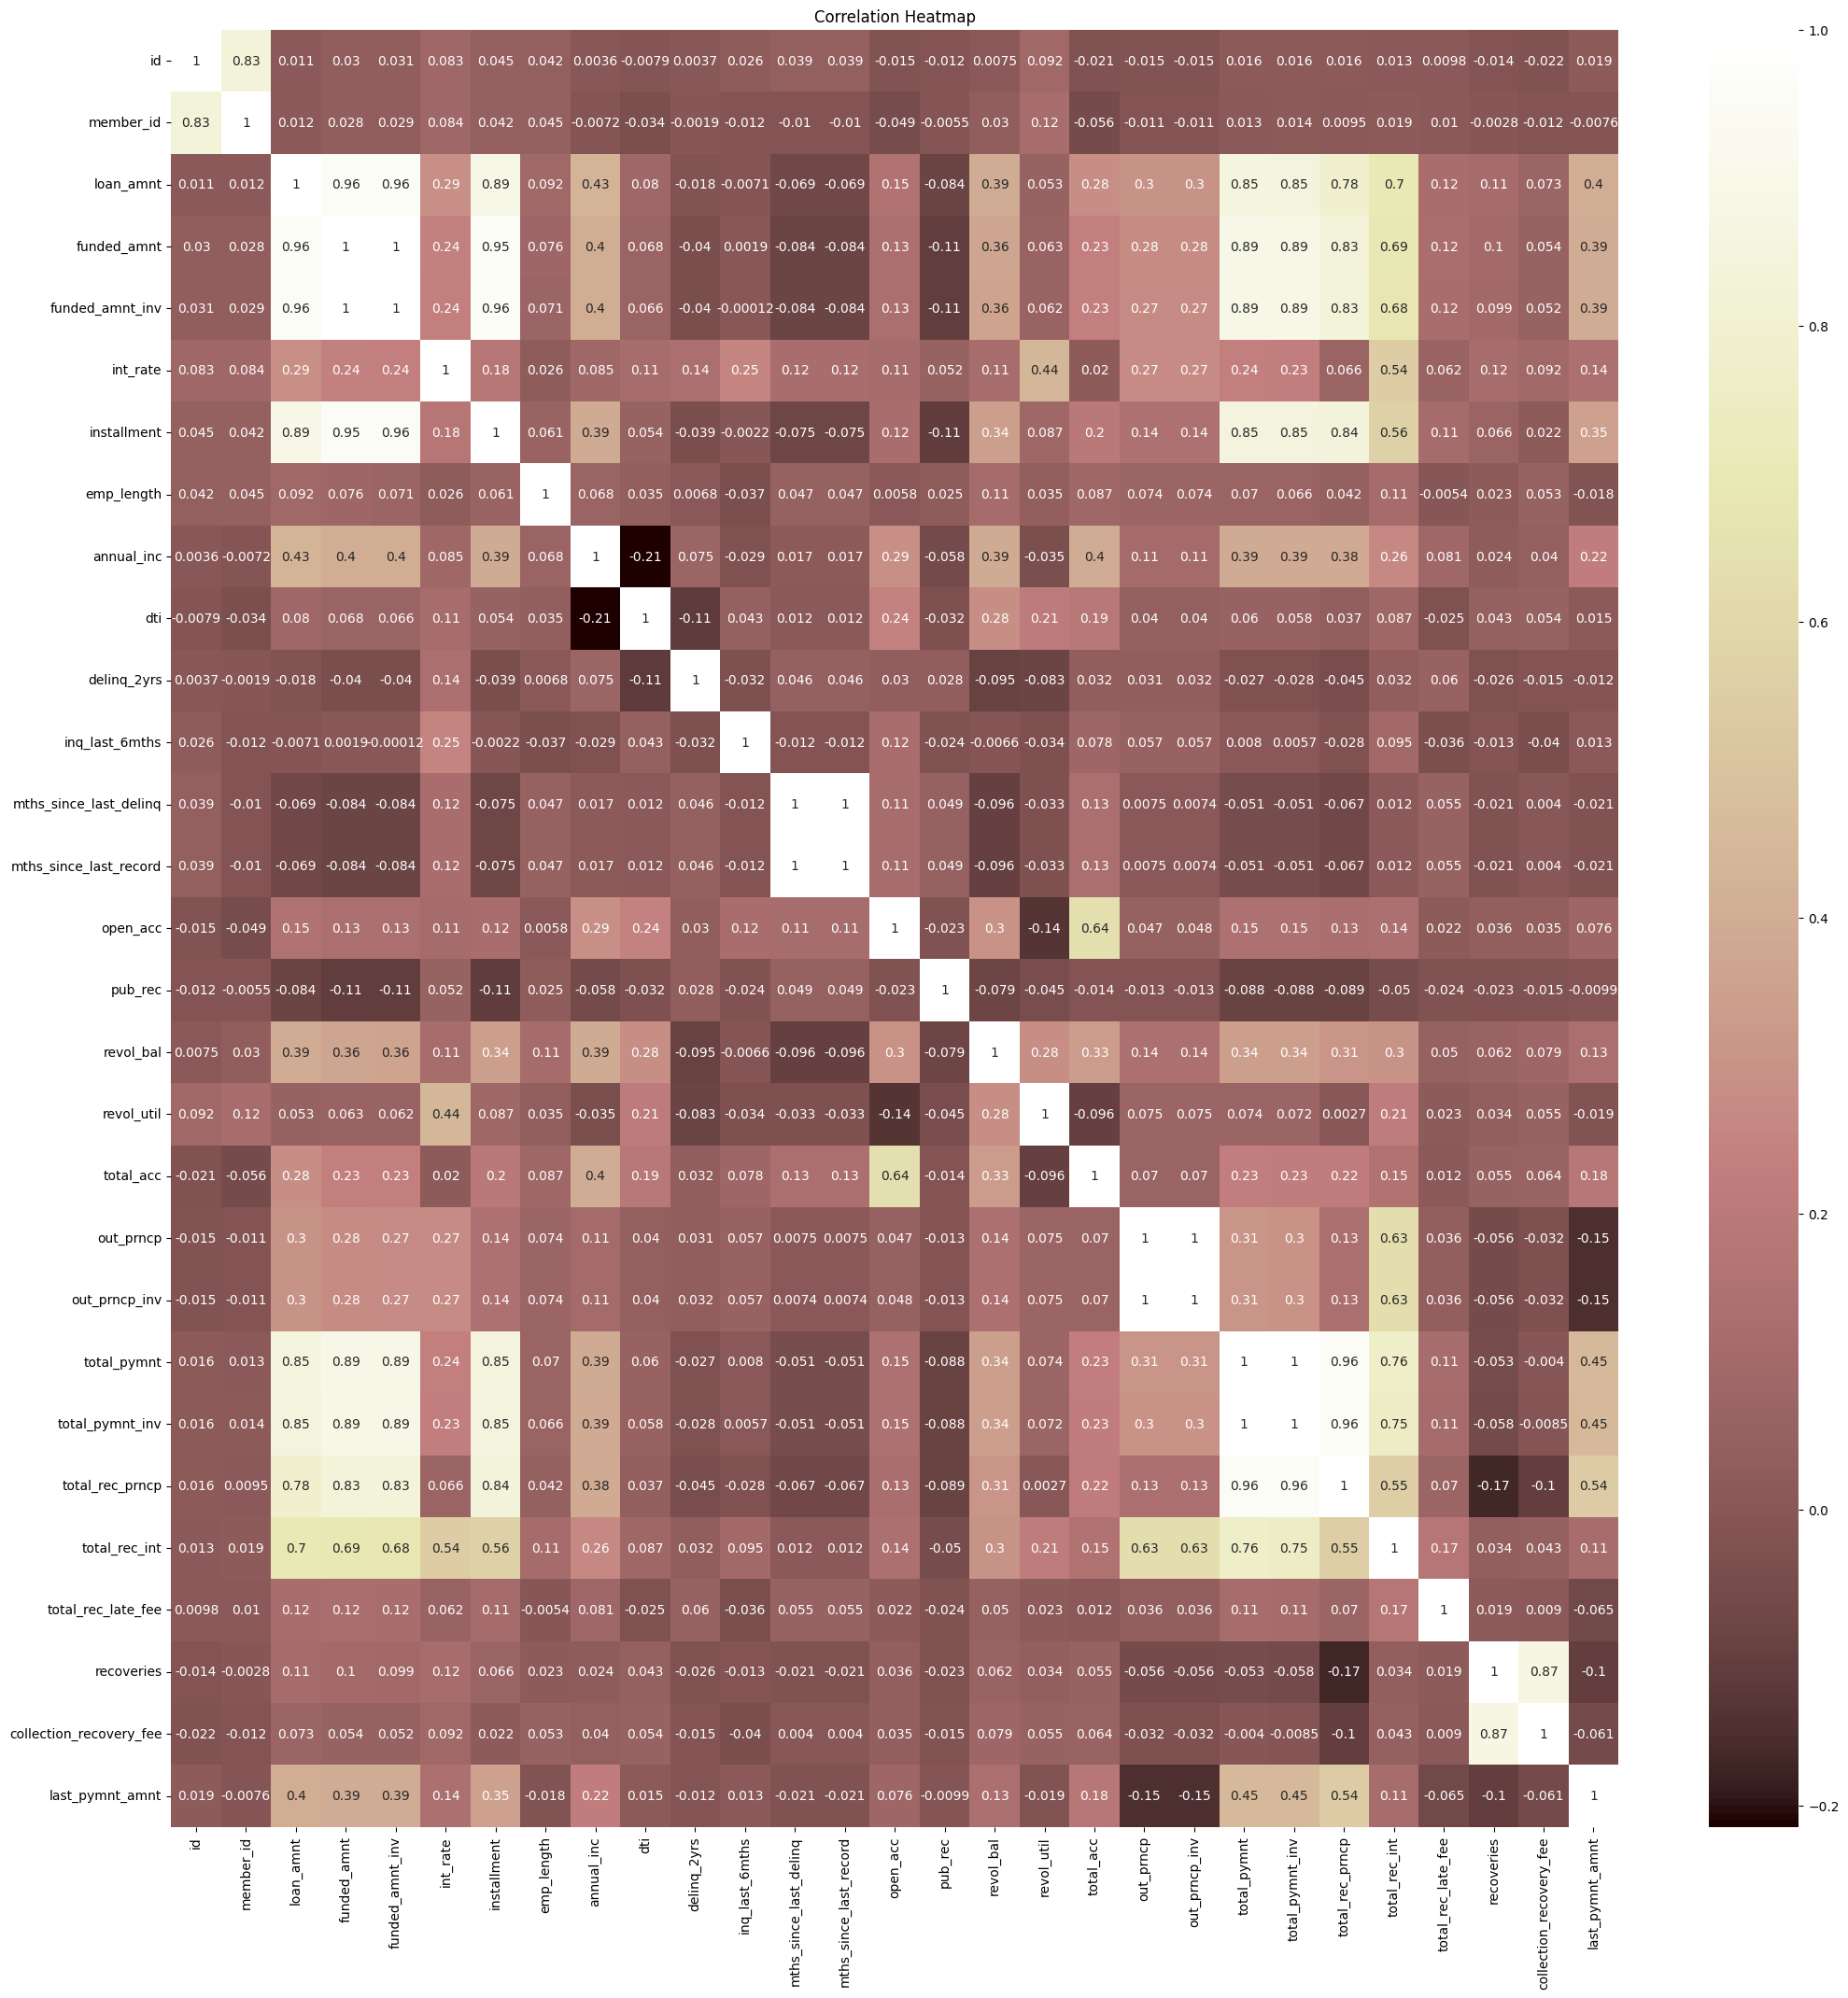

In [18]:
# Select only the numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate and plot
corr = df[numeric_columns].corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, cmap='pink')
plt.title('Correlation Heatmap')
plt.show()


The correlation heatmap shows the relationships between the different numeric variables in the loan dataset. 

The key findings are:

- Strong positive correlation: Loan amount and monthly installment
- Moderate positive correlation: Annual income and loan amount
- Moderate negative correlation: DTI and loan amount
- Weak negative correlation: Number of months since last delinquency and number of delinquencies in past 2 years

These findings can be used by borrowers and lenders to make more informed decisions. For example, borrowers should be aware of the monthly payments they will be required to make before taking out a loan. Lenders may want to consider a borrower's annual income and DTI when making lending decisions.

Additional observations:

- The correlation heatmap also shows that some of the variables are highly correlated with each other, such as loan amount and monthly installment. This is because the monthly installment is calculated based on the loan amount and the loan term.
- The correlation heatmap also shows that some of the variables are not correlated with each other, such as the number of months since the borrower's most recent delinquency and the borrower's annual income or DTI. This suggests that these variables are independent of each other.

Overall, the correlation heatmap provides a valuable overview of the relationships between the different numeric variables in the loan dataset. The findings can be used by borrowers and lenders to make more informed decisions.

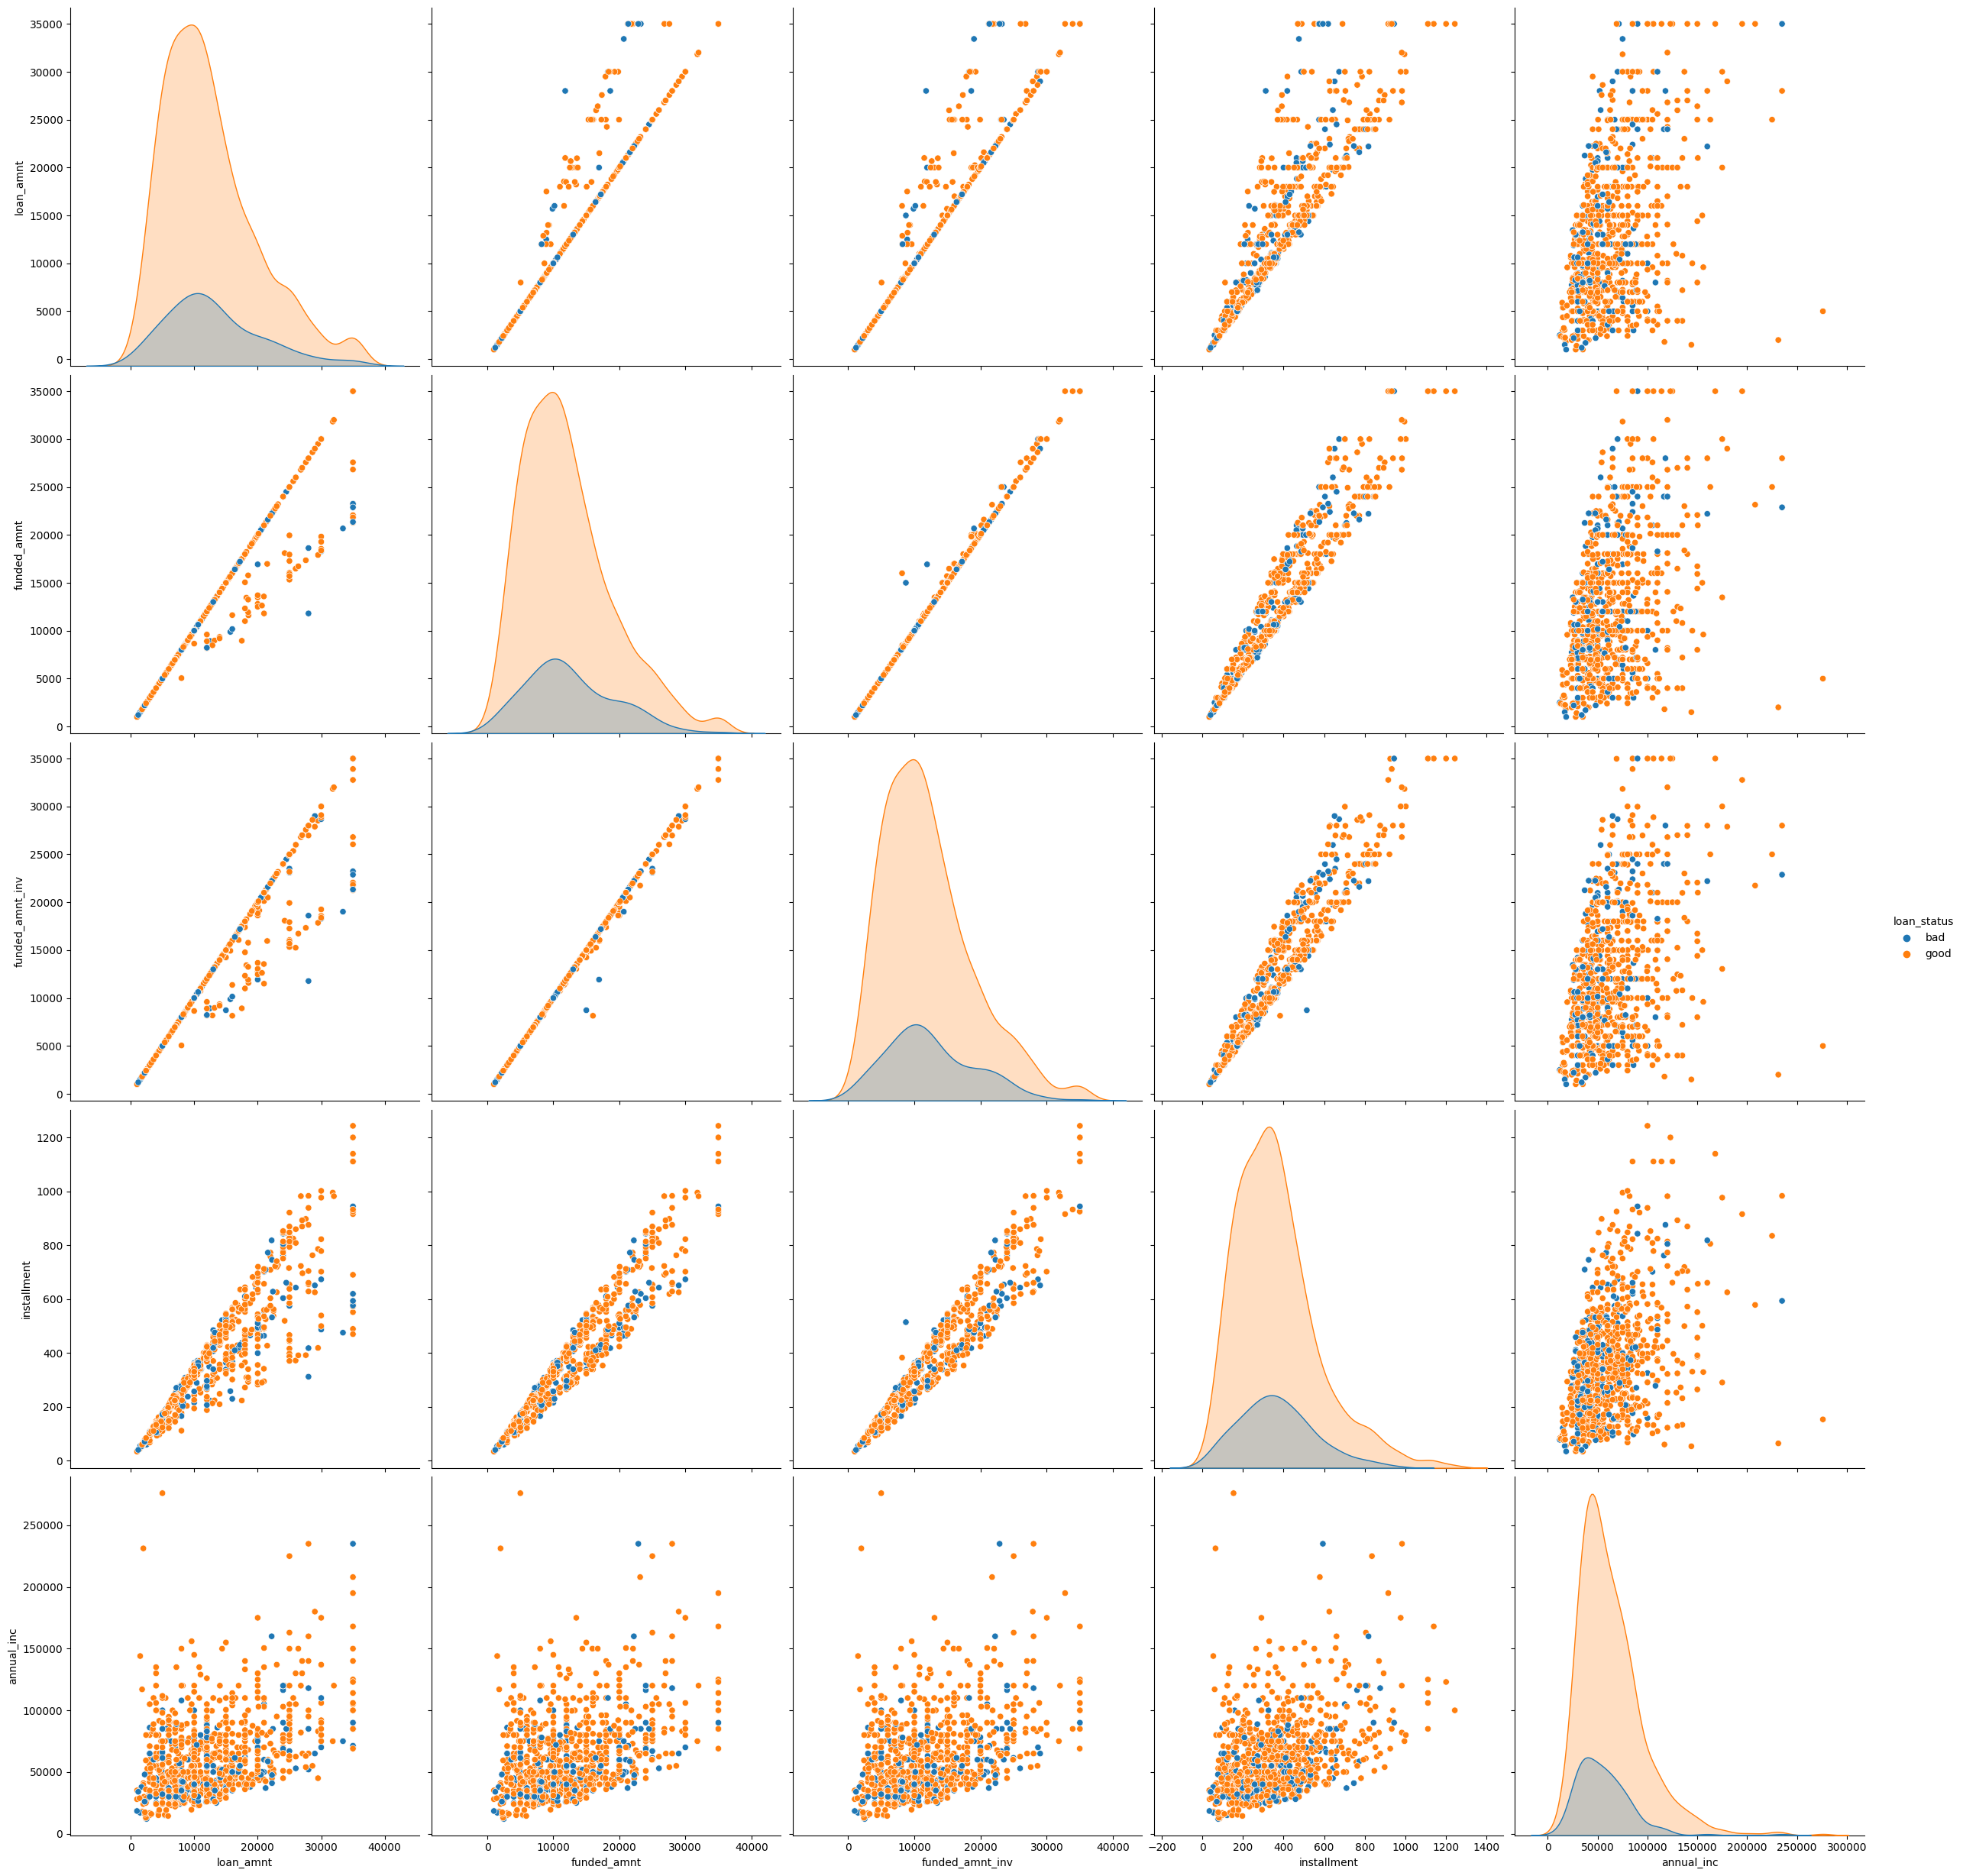

In [19]:
# Generate one Multivariate visualization of five variables

sns.pairplot(df, vars=['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc'], hue='loan_status', height=5)
plt.show()


Some key observations from the plot are:

- Loan amount, funded amount, funded investor amount, and installment are all higher for loans with good status than for loans with bad status. This is likely because borrowers with good credit history are more likely to be approved for larger loans at lower interest rates.
- There is a strong positive correlation between loan amount and funded amount. This means that borrowers who apply for larger loans are more likely to have their loans funded.
- There is also a strong positive correlation between funded amount and funded investor amount. This means that loans that are funded by more investors are more likely to be funded for larger amounts.
- Installment is also positively correlated with loan amount and funded amount. This means that borrowers who take out larger loans will have higher monthly installment payments.
- Annual income is positively correlated with all of the other variables, but the correlation is strongest with loan amount and funded amount. This means that borrowers with higher annual incomes are more likely to take out larger loans.

Overall, the pair plot provides a good overview of the relationships between the five variables. It shows that loan status, loan amount, funded amount, funded investor amount, installment, and annual income are all interrelated. Borrowers and lenders can use this information to make more informed decisions.

Here are some specific examples of how the information from the pair plot can be used:

- Borrowers:
1) If you are considering taking out a loan, be aware that the monthly installment payments will be higher if you borrow a larger amount.
2) If you have a lower annual income, you may want to consider taking out a smaller loan.
- Lenders:
1) When making lending decisions, you may want to consider the borrower's loan status, loan amount, funded amount, funded investor amount, installment, and annual income.
2) You may also want to consider the relationships between these variables. For example, you may want to be more cautious about lending to borrowers with high debt-to-income ratios or who are taking out large loans relative to their annual income.

#### 